# Lab 8: Linear Classifiers

## Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
cannabis = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1")
cannabis.shape

(2351, 69)

In [3]:
cannabis['Type'].value_counts()

Type
hybrid    1212
indica     699
sativa     440
Name: count, dtype: int64

In [4]:
cannabis.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part One: Binary Classification

## Data Preparation for Binary Classification

In [5]:
cannabis.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Creative',
       'Energetic', 'Tingly', 'Euphoric', 'Relaxed', 'Aroused', 'Happy',
       'Uplifted', 'Hungry', 'Talkative', 'Giggly', 'Focused', 'Sleepy', 'Dry',
       'Mouth', 'Earthy', 'Sweet', 'Citrus', 'Flowery', 'Violet', 'Diesel',
       'Spicy/Herbal', 'Sage', 'Woody', 'Apricot', 'Grapefruit', 'Orange',
       'Pungent', 'Grape', 'Pine', 'Skunk', 'Berry', 'Pepper', 'Menthol',
       'Blue', 'Cheese', 'Chemical', 'Mango', 'Lemon', 'Peach', 'Vanilla',
       'Nutty', 'Chestnut', 'Tea', 'Tobacco', 'Tropical', 'Strawberry',
       'Blueberry', 'Mint', 'Apple', 'Honey', 'Lavender', 'Lime', 'Coffee',
       'Ammonia', 'Minty', 'Tree', 'Fruit', 'Butter', 'Pineapple', 'Tar',
       'Rose', 'Plum', 'Pear'],
      dtype='object')

In [6]:
cannabis['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [7]:
binary_data = cannabis[cannabis['Type'].isin(['sativa', 'indica'])].copy()
binary_data.shape

(1139, 69)

In [8]:
binary_data['Type'].value_counts()

Type
indica    699
sativa    440
Name: count, dtype: int64

In [9]:
X_binary = binary_data.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'], axis=1, errors='ignore')
y_binary = binary_data['Type']

mask = X_binary.notna().all(axis=1)
X_binary = X_binary[mask]
y_binary = y_binary[mask]

X_binary.shape

(1118, 64)

I'm going to use accuracy for all the models since we don't have a specific target category that's more important than the other and the classes are reasonably balanced.

## Q1: LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

lda_cv_scores = cross_val_score(lda_pipeline, X_binary, y_binary, cv=5, scoring='accuracy')
lda_cv_scores.mean()


np.float64(0.8443705957719411)

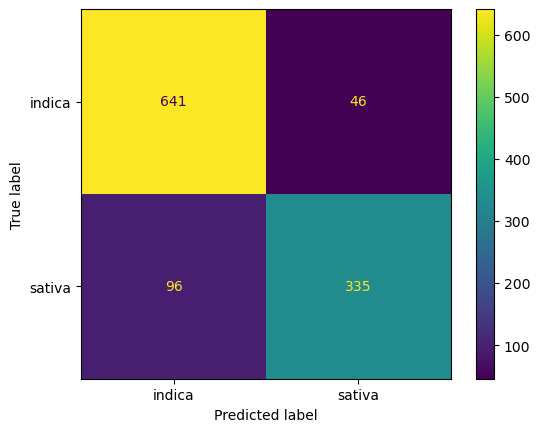

In [12]:
lda_pipeline.fit(X_binary, y_binary)
y_pred_lda = lda_pipeline.predict(X_binary)
cm_lda = confusion_matrix(y_binary, y_pred_lda)
disp = ConfusionMatrixDisplay(cm_lda, display_labels=['indica', 'sativa'])
disp.plot()
plt.show()


## Q2: QDA

In [15]:
qda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis())
])

qda_cv_scores = cross_val_score(qda_pipeline, X_binary, y_binary, cv=5, scoring='accuracy')
qda_cv_scores.mean()

c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\U

np.float64(0.45607783472133245)

c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


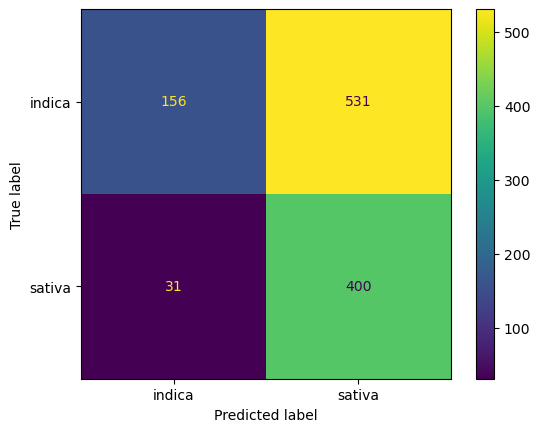

In [17]:
qda_pipeline.fit(X_binary, y_binary)
y_pred_qda = qda_pipeline.predict(X_binary)
cm_qda = confusion_matrix(y_binary, y_pred_qda)
disp = ConfusionMatrixDisplay(cm_qda, display_labels=['indica', 'sativa'])
disp.plot()
plt.show()

## Q3: SVC

In [27]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy')
grid_svc.fit(X_binary, y_binary)
grid_svc.best_params_

{'svc__C': 0.01}

In [19]:
grid_svc.best_score_

np.float64(0.8452714606021783)

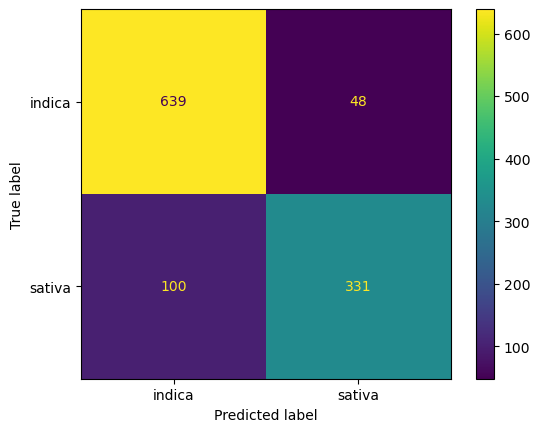

In [20]:
y_pred_svc = grid_svc.predict(X_binary)
cm_svc = confusion_matrix(y_binary, y_pred_svc)
disp = ConfusionMatrixDisplay(cm_svc, display_labels=['indica', 'sativa'])
disp.plot()
plt.show()

## Q4: SVM (Polynomial Kernel)

In [29]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly'))
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__degree': [2, 3, 4]
}
grid_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_binary, y_binary)
grid_svm.best_params_

{'svm__C': 10, 'svm__degree': 3}

In [22]:
grid_svm.best_score_

np.float64(0.8247317424727738)

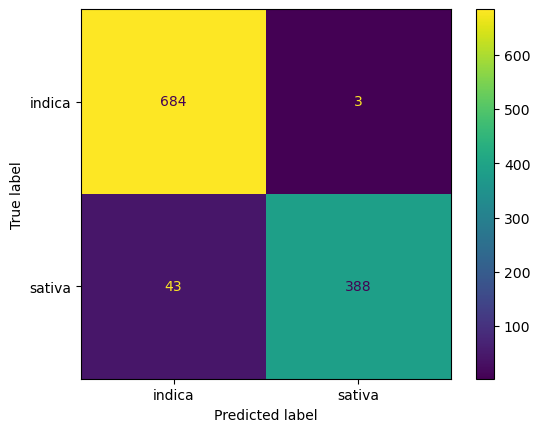

In [24]:
y_pred_svm = grid_svm.predict(X_binary)
cm_svm = confusion_matrix(y_binary, y_pred_svm)
disp = ConfusionMatrixDisplay(cm_svm, display_labels=['indica', 'sativa'])
disp.plot()
plt.show()

In [31]:
import pandas as pd

results_df = pd.DataFrame({
    'model': ['LDA', 'QDA', 'SVC', 'SVM'],
    'accuracy': [lda_cv_scores.mean(), qda_cv_scores.mean(), grid_svc.best_score_, grid_svm.best_score_]
})
results_df

,model,accuracy
0,LDA,0.844371
1,QDA,0.456078
2,SVC,0.845271
3,SVM,0.824732


# Part Two: Natural Multiclass



Same as beffore but dont get rid of hybrids.

In [32]:
X_multi = cannabis.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'], axis=1, errors='ignore')
y_multi = cannabis['Type']

mask = X_multi.notna().all(axis=1)
X_multi = X_multi[mask]
y_multi = y_multi[mask]

X_multi.shape

(2305, 64)

In [33]:
y_multi.value_counts()

Type
hybrid    1187
indica     687
sativa     431
Name: count, dtype: int64

## Q1: Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(random_state=42))
])

# proffesor bodwin told me about tree_min_impurity_decrease in office hours 

param_grid = {'tree__min_impurity_decrease': [0.0, 0.001, 0.01, 0.05, 0.1]}
grid_tree = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='accuracy')
grid_tree.fit(X_multi, y_multi)
grid_tree.best_params_

{'tree__min_impurity_decrease': 0.01}

In [35]:
grid_tree.best_score_

np.float64(0.612581344902386)

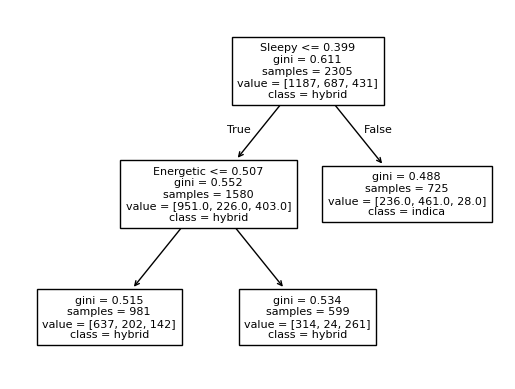

In [44]:
plt.figure()
plot_tree(grid_tree.best_estimator_.named_steps['tree'], 
          feature_names=X_multi.columns,
          class_names=['hybrid', 'indica', 'sativa'],
          fontsize=8,
          max_depth=3)
plt.show()

The decision tree uses a series of bolleans splits on the effect and flavor features to classify the weed strains. It starts with the boolean measuring sleepness, which seems to seperates it into hybrid and indiac starains, the hybrids are they slop baed on how user rated it for "energetic." 

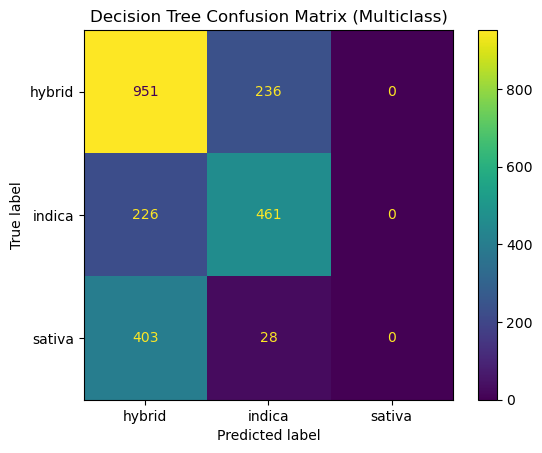

In [45]:
y_pred_tree = grid_tree.predict(X_multi)
cm_tree = confusion_matrix(y_multi, y_pred_tree)
disp = ConfusionMatrixDisplay(cm_tree, display_labels=['hybrid', 'indica', 'sativa'])
disp.plot()
plt.show()

## Q2: LDA, QDA, knn

In [46]:
lda_multi_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

lda_multi_scores = cross_val_score(lda_multi_pipeline, X_multi, y_multi, cv=5, scoring='accuracy')
lda_multi_scores.mean()

np.float64(0.6308026030368764)

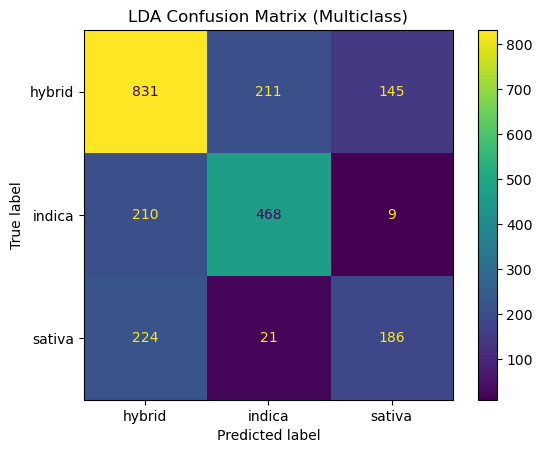

In [47]:
lda_multi_pipeline.fit(X_multi, y_multi)
y_pred_lda_multi = lda_multi_pipeline.predict(X_multi)
cm_lda_multi = confusion_matrix(y_multi, y_pred_lda_multi)
disp = ConfusionMatrixDisplay(cm_lda_multi, display_labels=['hybrid', 'indica', 'sativa'])
disp.plot()
plt.show()

In [48]:
qda_multi_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis())
])

qda_multi_scores = cross_val_score(qda_multi_pipeline, X_multi, y_multi, cv=5, scoring='accuracy')
qda_multi_scores.mean()

c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\U

np.float64(0.2516268980477223)

c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\spink\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


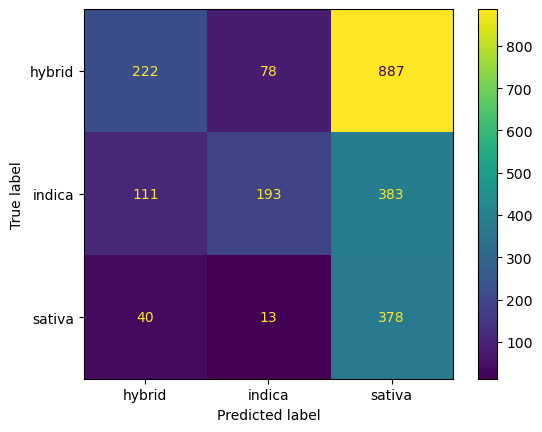

In [49]:
qda_multi_pipeline.fit(X_multi, y_multi)
y_pred_qda_multi = qda_multi_pipeline.predict(X_multi)
cm_qda_multi = confusion_matrix(y_multi, y_pred_qda_multi)
disp = ConfusionMatrixDisplay(cm_qda_multi, display_labels=['hybrid', 'indica', 'sativa'])
disp.plot()
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11, 15]}
grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_multi, y_multi)
grid_knn.best_params_

{'knn__n_neighbors': 15}

In [54]:
grid_knn.best_score_

np.float64(0.551409978308026)

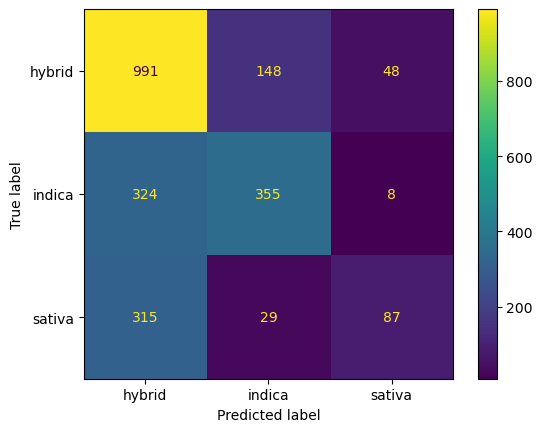

In [52]:
y_pred_knn = grid_knn.predict(X_multi)
cm_knn = confusion_matrix(y_multi, y_pred_knn)
disp = ConfusionMatrixDisplay(cm_knn, display_labels=['hybrid', 'indica', 'sativa'])
disp.plot()
plt.show()

## Q3: compare to part 1

In [56]:
comparison_df = pd.DataFrame({
    'model': ['LDA', 'QDA', 'LDA', 'QDA', 'KNN', 'Tree'],
    'type': ['Binary', 'Binary', 'Multiclass', 'Multiclass', 'Multiclass', 'Multiclass'],
    'accuracy': [lda_cv_scores.mean(), qda_cv_scores.mean(), 
                 lda_multi_scores.mean(), qda_multi_scores.mean(), 
                 grid_knn.best_score_, grid_tree.best_score_]
})
comparison_df

,model,type,accuracy
0,LDA,Binary,0.844371
1,QDA,Binary,0.456078
2,LDA,Multiclass,0.630803
3,QDA,Multiclass,0.251627
4,KNN,Multiclass,0.551410
5,Tree,Multiclass,0.612581


The multiclass metrics arnt as good as the binary metrics. This makes sense becuse having three classes instead of two measn more chances to miscalssify strains. Also, hybrid is acombination of sative adn indaic, so it might be harder to tell apart. This is show in the confusion amtrices wehrer hybrid strains are shown to be misclasified the most. That beign said we only have two metrics that comapre, but I think that enough to back up our cocnlusiosn given taht make logical sence without any merics to back them up. 

# Part Three: Multiclass from Binary

## Q1: One v Rest

I think here ill need to use accuracy as weel as preciosn and recall, maybe just F1 if im feeling lazy. Bu twe need to add something else becasue now tha twe put hybrid back in to type the data isent balenced, or at leat alot less balence than it ws in part 3. Also remeber to models for each comaprison for THE ENTIER PART to do two for each, one for CVS and one for Logistic Regression. 

In [73]:
y_indica = (y_multi == 'indica').astype(int)
svc_indica = Pipeline(
    [('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])

svc_indica.fit(X_multi, y_indica)

y_pred_svc_indica = svc_indica.predict(X_multi)
acc_svc_indica = accuracy_score(y_indica, y_pred_svc_indica)
f1_svc_indica = f1_score(y_indica, y_pred_svc_indica)

acc_svc_indica, f1_svc_indica

(0.7908893709327549, 0.6566951566951567)

In [74]:
y_sativa = (y_multi == 'sativa').astype(int)
svc_sativa = Pipeline(
    [('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])

svc_sativa.fit(X_multi, y_sativa)

y_pred_svc_sativa = svc_sativa.predict(X_multi)
acc_svc_sativa = accuracy_score(y_sativa, y_pred_svc_sativa)
f1_svc_sativa = f1_score(y_sativa, y_pred_svc_sativa)

acc_svc_sativa, f1_svc_sativa

(0.8134490238611713, 0.022727272727272728)

In [75]:
y_hybrid = (y_multi == 'hybrid').astype(int)
svc_hybrid = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])

svc_hybrid.fit(X_multi, y_hybrid)

y_pred_svc_hybrid = svc_hybrid.predict(X_multi)
acc_svc_hybrid = accuracy_score(y_hybrid, y_pred_svc_hybrid)
f1_svc_hybrid = f1_score(y_hybrid, y_pred_svc_hybrid)

acc_svc_hybrid, f1_svc_hybrid 


(0.631236442516269, 0.6879588839941263)

In [78]:
lr_indica_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_indica_pipeline.fit(X_multi, y_indica)

y_pred_lr_indica = lr_indica_pipeline.predict(X_multi)
acc_lr_indica = accuracy_score(y_indica, y_pred_lr_indica)
f1_lr_indica = f1_score(y_indica, y_pred_lr_indica)

acc_lr_indica, f1_lr_indica

(0.8091106290672451, 0.6610169491525424)

In [77]:
lr_sativa_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_sativa_pipeline.fit(X_multi, y_sativa)

y_pred_lr_sativa = lr_sativa_pipeline.predict(X_multi)
acc_lr_sativa = accuracy_score(y_sativa, y_pred_lr_sativa)
f1_lr_sativa = f1_score(y_sativa, y_pred_lr_sativa)

acc_lr_sativa, f1_lr_sativa

(0.8351409978308026, 0.43283582089552236)

In [79]:
lr_hybrid_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_hybrid_pipeline.fit(X_multi, y_hybrid)

y_pred_lr_hybrid = lr_hybrid_pipeline.predict(X_multi)
acc_lr_hybrid = accuracy_score(y_hybrid, y_pred_lr_hybrid)
f1_lr_hybrid = f1_score(y_hybrid, y_pred_lr_hybrid)

acc_lr_hybrid, f1_lr_hybrid

(0.6468546637744035, 0.6730923694779116)

In [81]:
ovr_df = pd.DataFrame({
    'modul': ['SVC', 'SVC', 'SVC', 'LogReg', 'LogReg', 'LogReg'],
    'class': ['indica', 'sativa', 'hybrid', 'indica', 'sativa', 'hybrid'],
    'accuracy': [acc_svc_indica, acc_svc_sativa, acc_svc_hybrid, 
                 acc_lr_indica, acc_lr_sativa, acc_lr_hybrid],
    'F1': [f1_svc_indica, f1_svc_sativa, f1_svc_hybrid,
           f1_lr_indica, f1_lr_sativa, f1_lr_hybrid]
})
ovr_df

,modul,class,accuracy,F1
0,SVC,indica,0.790889,0.656695
1,SVC,sativa,0.813449,0.022727
2,SVC,hybrid,0.631236,0.687959
3,LogReg,indica,0.809111,0.661017
4,LogReg,sativa,0.835141,0.432836
5,LogReg,hybrid,0.646855,0.673092


## Q2: OvR

In [80]:
best_idx = ovr_df['F1'].idxmax()
worst_idx = ovr_df['F1'].idxmin()
ovr_df.iloc[[best_idx, worst_idx]]

,Model,Class,Accuracy,F1
2,SVC,hybrid,0.631236,0.687959
1,SVC,sativa,0.813449,0.022727


The Hybrid category likely performs worst in OvR because Hybrids share characteristics with both Sativa and Indica so it hard to tell hybrids appart as a distinct category. The mutch larger gap between F1 scores than accurracy seems to show that the data is imablence, so im gald I bothered to clculate f1 as well. Each on will need to have x and y redeffined.

## Q3: One v One

Instead of comparing one type to the other types lump together, now we're just comapring one type to another. So I think we have to drop the one of the three types of each model. Now taht were beack to binary outcome, the data shoudl be balenced again, so instead of F1 im goign to do ROC, becasue Roc is specificly for binary outcomes. 

In [82]:
mask_ind_sat = y_multi.isin(['indica', 'sativa'])
X_ind_sat = X_multi[mask_ind_sat]
y_ind_sat = y_multi[mask_ind_sat]

In [85]:
X_ind_sat.shape

(1118, 64)

In [87]:
y_ind_sat.shape

(1118,)

In [88]:
svc_ind_sat = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])
svc_ind_sat.fit(X_ind_sat, y_ind_sat)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [90]:
y_pred_svc_ind_sat = svc_ind_sat.predict(X_ind_sat)

y_score_svc_ind_sat = svc_ind_sat.decision_function(X_ind_sat)
acc_svc_ind_sat = accuracy_score(y_ind_sat, y_pred_svc_ind_sat)
roc_svc_ind_sat = roc_auc_score(y_ind_sat == 'sativa', y_score_svc_ind_sat)

acc_svc_ind_sat, roc_svc_ind_sat

(0.8810375670840788, np.float64(0.9480305440446881))

In [91]:
mask_ind_hyb = y_multi.isin(['indica', 'hybrid'])
X_ind_hyb = X_multi[mask_ind_hyb]
y_ind_hyb = y_multi[mask_ind_hyb]

In [92]:
svc_ind_hyb = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])
svc_ind_hyb.fit(X_ind_hyb, y_ind_hyb)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [93]:
y_pred_svc_ind_hyb = svc_ind_hyb.predict(X_ind_hyb)

y_score_svc_ind_hyb = svc_ind_hyb.decision_function(X_ind_hyb)
acc_svc_ind_hyb = accuracy_score(y_ind_hyb, y_pred_svc_ind_hyb)
roc_svc_ind_hyb = roc_auc_score(y_ind_hyb == 'hybrid', y_score_svc_ind_hyb)

acc_svc_ind_hyb, roc_svc_ind_hyb

(0.7572038420490929, np.float64(0.24532876173097937))

In [94]:
mask_hyb_sat = y_multi.isin(['hybrid', 'sativa'])
X_hyb_sat = X_multi[mask_hyb_sat]
y_hyb_sat = y_multi[mask_hyb_sat]

In [95]:
svc_hyb_sat = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))])
svc_hyb_sat.fit(X_hyb_sat, y_hyb_sat)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [96]:
y_pred_svc_hyb_sat = svc_hyb_sat.predict(X_hyb_sat)

y_score_svc_hyb_sat = svc_hyb_sat.decision_function(X_hyb_sat)

acc_svc_hyb_sat = accuracy_score(y_hyb_sat, y_pred_svc_hyb_sat)
roc_svc_hyb_sat = roc_auc_score(y_hyb_sat == 'sativa', y_score_svc_hyb_sat)

acc_svc_hyb_sat, roc_svc_hyb_sat

(0.7744128553770087, np.float64(0.7721331438612813))

In [97]:
lr_ind_sat_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_ind_sat_pipeline.fit(X_ind_sat, y_ind_sat)

y_pred_lr_ind_sat = lr_ind_sat_pipeline.predict(X_ind_sat)
y_proba_lr_ind_sat = lr_ind_sat_pipeline.predict_proba(X_ind_sat)[:, 1]


acc_lr_ind_sat = accuracy_score(y_ind_sat, y_pred_lr_ind_sat)
roc_lr_ind_sat = roc_auc_score(y_ind_sat == 'sativa', y_proba_lr_ind_sat)

acc_lr_ind_sat, roc_lr_ind_sat

(0.8747763864042933, np.float64(0.9495975980844115))

In [100]:
lr_ind_hyb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_ind_hyb_pipeline.fit(X_ind_hyb, y_ind_hyb)

y_pred_lr_ind_hyb = lr_ind_hyb_pipeline.predict(X_ind_hyb)
y_proba_lr_ind_hyb = lr_ind_hyb_pipeline.predict_proba(X_ind_hyb)[:, 1]

In [101]:
acc_lr_ind_hyb = accuracy_score(y_ind_hyb, y_pred_lr_ind_hyb)
roc_lr_ind_hyb = roc_auc_score(y_ind_hyb == 'hybrid', y_proba_lr_ind_hyb)

acc_lr_ind_hyb, roc_lr_ind_hyb

(0.7710779082177162, np.float64(0.171691382505037))

In [102]:
lr_hyb_sat_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_hyb_sat_pipeline.fit(X_hyb_sat, y_hyb_sat)

y_pred_lr_hyb_sat = lr_hyb_sat_pipeline.predict(X_hyb_sat)
y_proba_lr_hyb_sat = lr_hyb_sat_pipeline.predict_proba(X_hyb_sat)[:, 1]


In [103]:
acc_lr_hyb_sat = accuracy_score(y_hyb_sat, y_pred_lr_hyb_sat)
roc_lr_hyb_sat = roc_auc_score(y_hyb_sat == 'sativa', y_proba_lr_hyb_sat)
acc_lr_hyb_sat, roc_lr_hyb_sat

(0.7688504326328801, np.float64(0.781738360467321))

In [106]:
ovo_df = pd.DataFrame({
    'model': ['SVC', 'SVC', 'SVC', 'LogReg', 'LogReg', 'LogReg'],
    'pairs': ['indica vs sativa', 'indica vs hybrid', 'hybrid vs sativa',
             'indica vs sativa', 'indica vs hybrid', 'hybrid vs sativa'],
    'acuracy': [acc_svc_ind_sat, acc_svc_ind_hyb, acc_svc_hyb_sat,
                 acc_lr_ind_sat, acc_lr_ind_hyb, acc_lr_hyb_sat],
    'ROC': [roc_svc_ind_sat, roc_svc_ind_hyb, roc_svc_hyb_sat,
                roc_lr_ind_sat, roc_lr_ind_hyb, roc_lr_hyb_sat]
})
ovo_df

,model,pairs,acuracy,ROC
0,SVC,indica vs sativa,0.881038,0.948031
1,SVC,indica vs hybrid,0.757204,0.245329
2,SVC,hybrid vs sativa,0.774413,0.772133
3,LogReg,indica vs sativa,0.874776,0.949598
4,LogReg,indica vs hybrid,0.771078,0.171691
5,LogReg,hybrid vs sativa,0.768850,0.781738


## Q4: OvO

In [108]:
best_idx = ovo_df['ROC'].idxmax()
worst_idx = ovo_df['ROC'].idxmin()
ovo_df.iloc[[best_idx, worst_idx]]

,model,pairs,acuracy,ROC
3,LogReg,indica vs sativa,0.874776,0.949598
4,LogReg,indica vs hybrid,0.771078,0.171691


So bacialy the same thing happend again where the comapnirsion taht didient include hybrid preformed best prorbalay for the smae reasosn that I talked about beffore. Hybrid is literlay a hybrid of staive adn indiac and therfor shares alot of charatrisits like taste, effect, etc with both indicia and sataive so its diffficautlt to tall a hybrid a paprt for an idica or a sativa. 

## Q5

Logistical Regression would have automaticly taken the OvR  approach by deaufalt beucase it a binary outcome model. On the other hand, SVC autoamticly does one v one. Also, for what I can gather form the sklear documentison besaicly everything we did in this part jsut gets doen by the package wihtout the user even realising it. This lab madkes me grateful for pythons opensource packeges becasue oh my god that was alot of doing the same thing over and over! 